# Supermarket store branches sales analysis

## Context
#####               A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

## Content

##### In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

##### Store ID: (Index) ID of the particular store.

##### Store_Area: Physical Area of the store in yard square.

##### Items_Available: Number of different items available in the corresponding store.

##### DailyCustomerCount: Number of customers who visited to stores on an average over month.

##### Store_Sales: Sales in (US Dollars) that stores made.

## Acknowledgement
##### The data is obtained from the project from the University after seeking proper permission.

## Inspiration
###### Analyzing the performances of stores in the past on basis of which will try to rectify defects as well as to leverage the positives. Who doesn't want to increase their profits right?

# Importing the Necessary Libraries

### Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Read CSV file as DataFrame

In [11]:
df = pd.read_csv('./Stores.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


### Data Cleaning

In [13]:
clean_df = df.dropna()
clean_df.info()
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


# Sorting dataframes by diferent variables

### sorting stores by descending number of items available

In [27]:
items_clean_df = clean_df.sort_values('Items_Available', ascending = False)
items_clean_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
466,467,2229,2667,660,87410
540,541,2214,2647,740,65900
91,92,2169,2617,600,67080
398,399,2063,2493,810,51480
849,850,2067,2492,790,70230


#### Checking Correlation of  items to daily customers

<AxesSubplot:>

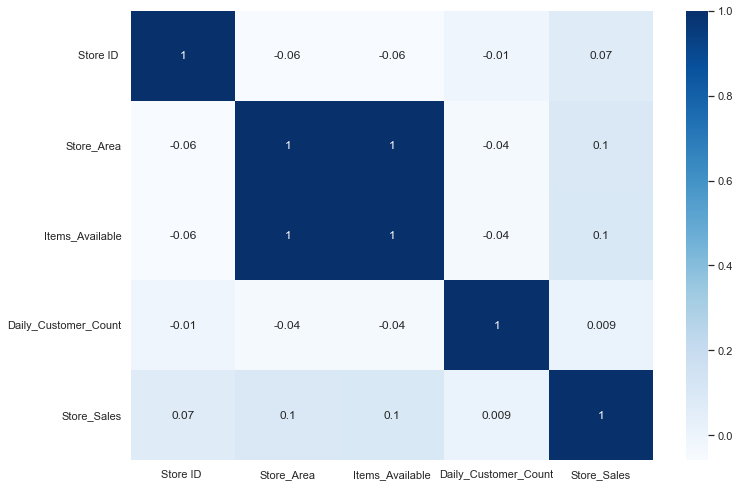

In [83]:
corr = items_clean_df.corr()
sns.heatmap(corr, annot =True, cmap='Blues', fmt='.1g')

In [70]:
### According to the Heatmap above we can infer that the stores with a higher store area (size of store) number has a direct correlation with the number of items it offers.
### there can be a number of positive correlations that can be observed within regards to other variables however, it is not high enough to infer that it makes a difference.

## Creating different Data Frames to split the date into smaller parts for better visualisation

### taking a look at different data from different columns

In [84]:
clean_df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### identifying the Store with highest and lowest sales

In [95]:
clean_df['Store_Sales'].max()
highest_Sales = clean_df[clean_df['Store_Sales'] == 116320]
highest_Sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320


In [ ]:
### store ID 650 had the highest sales of 116320, while having a daily customer count that is slightly more than half of the store with the highest daily customer count

In [93]:
clean_df['Store_Sales'].min()
Lowest_Sales = clean_df[clean_df['Store_Sales'] == 14920]
Lowest_Sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1250,1508,990,14920


In [94]:
### Store 32 which had 110 more customers on average daily, had the lowest Store Sales amongst all stores.

### Identifying which stores were above or below the median amount of Store Sales

#### Above Median

In [100]:
clean_df['Store_Sales'].mean()
above_Median_Sales = clean_df[clean_df['Store_Sales'] >= 59351.30580357143]
above_Median_Sales.info()
above_Median_Sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 894
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              433 non-null    int64
 1   Store_Area            433 non-null    int64
 2   Items_Available       433 non-null    int64
 3   Daily_Customer_Count  433 non-null    int64
 4   Store_Sales           433 non-null    int64
dtypes: int64(5)
memory usage: 20.3 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
6,7,1542,1858,1030,72240
10,11,1187,1439,1090,71280
12,13,1746,2064,1050,60470
14,15,1469,1756,770,66360


In [ ]:
### out of 896 Stores, 433 stores are above the median amount of Store Sales.
### in Another words about 48% of stores are at or above the median.

### visual of distribution of sales depending of the daily Customer Count

Text(0, 0.5, 'Sales in USD per Store')

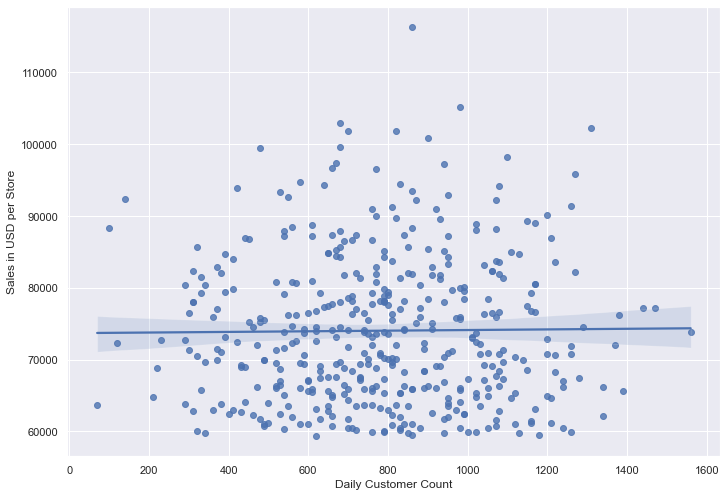

In [144]:
a1 = sns.regplot(x='Daily_Customer_Count', y='Store_Sales', data = above_Median_Sales)
a1.set_xlabel('Daily Customer Count')
a1.set_ylabel('Sales in USD per Store')

### visual of distribution of sales depending of the number of Items Available

Text(0, 0.5, 'Sales in USD per Store')

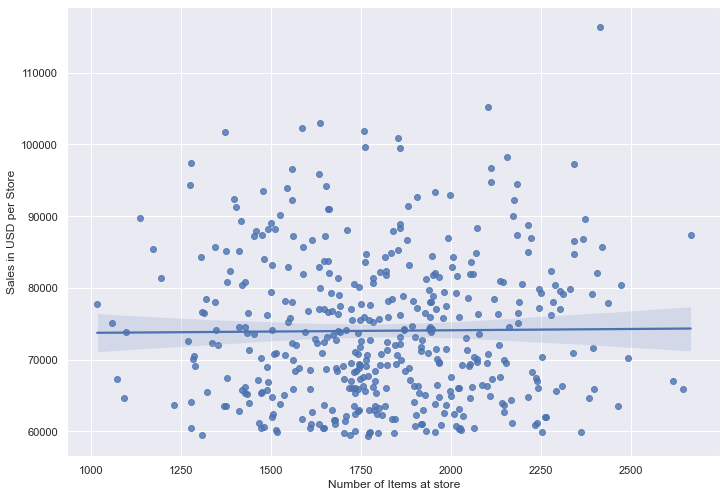

In [139]:
a2 = sns.regplot(x='Items_Available', y='Store_Sales', data =above_Median_Sales)
a2.set_xlabel('Number of Items at store')
a2.set_ylabel('Sales in USD per Store')

### visual of distribution of sales depending of the Size of store

Text(0, 0.5, 'Sales in USD per Store')

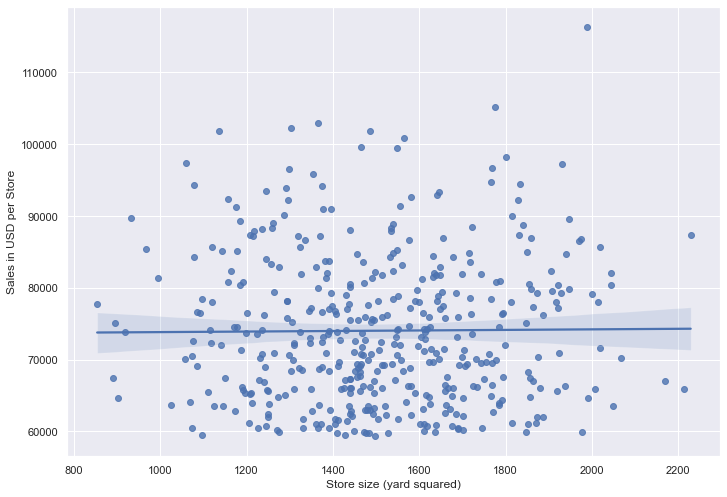

In [138]:
a3 = sns.regplot(x='Store_Area', y='Store_Sales', data =above_Median_Sales)
a3.set_xlabel('Store size (yard squared)')
a3.set_ylabel('Sales in USD per Store')

### visual of direct Correlation between size of store and number of items

Text(0, 0.5, 'Store size( yards squared)')

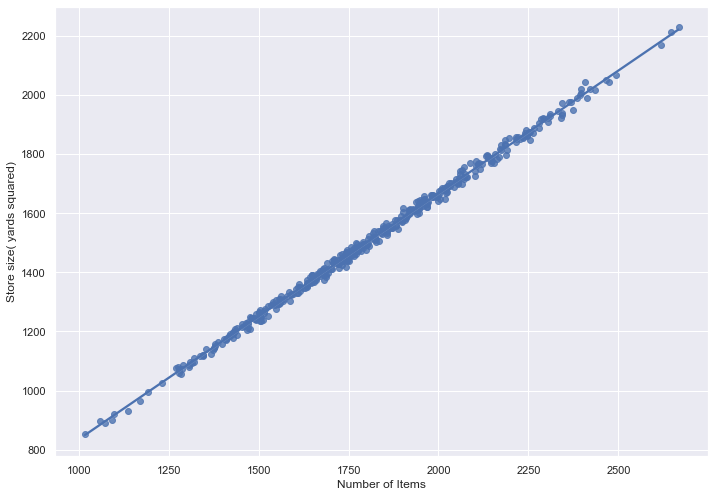

In [142]:
a4 = sns.regplot(x='Items_Available', y='Store_Area', data = above_Median_Sales)
a4.set_xlabel('Number of Items')
a4.set_ylabel('Store size( yards squared)')

In [ ]:
### as you can observe in the graphs above the only direct correlation that can be observed is the same as observed by the heatmap. which leads to conclude number of items, daily visits, and store size does not have a direct correlation to sales totals.


#### Below Median

In [104]:
below_median_sales = clean_df[clean_df['Store_Sales'] <  59351.30580357143]
below_median_sales.info()
below_median_sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 1 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              463 non-null    int64
 1   Store_Area            463 non-null    int64
 2   Items_Available       463 non-null    int64
 3   Daily_Customer_Count  463 non-null    int64
 4   Store_Sales           463 non-null    int64
dtypes: int64(5)
memory usage: 21.7 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260


In [ ]:
### out of 896 Stores, 463 stores are below the median amount of Store Sales.
 ### in Another words  52% of stores are below the median.

### visual of distribution of sales depending of the daily Customer Count

Text(0, 0.5, 'Sales in USD per Store')

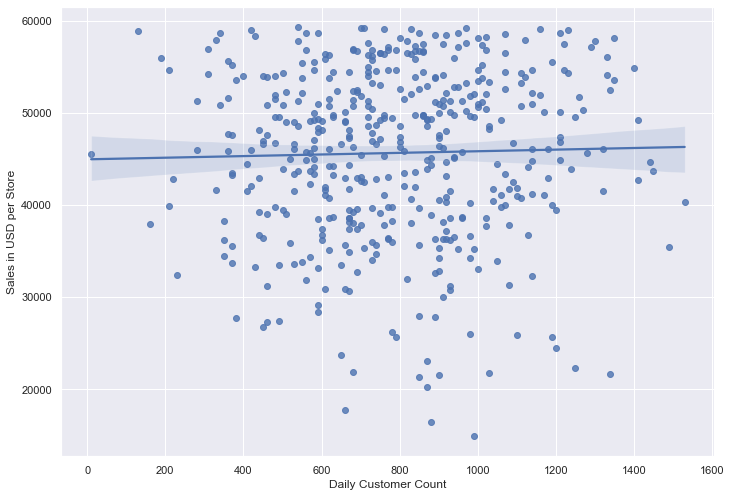

In [143]:
b1 = sns.regplot(x='Daily_Customer_Count', y='Store_Sales', data = below_median_sales)
b1.set_xlabel('Daily Customer Count')
b1.set_ylabel('Sales in USD per Store')

### visual of distribution of sales depending of the number of Items Available

Text(0, 0.5, 'Sales in USD per Store')

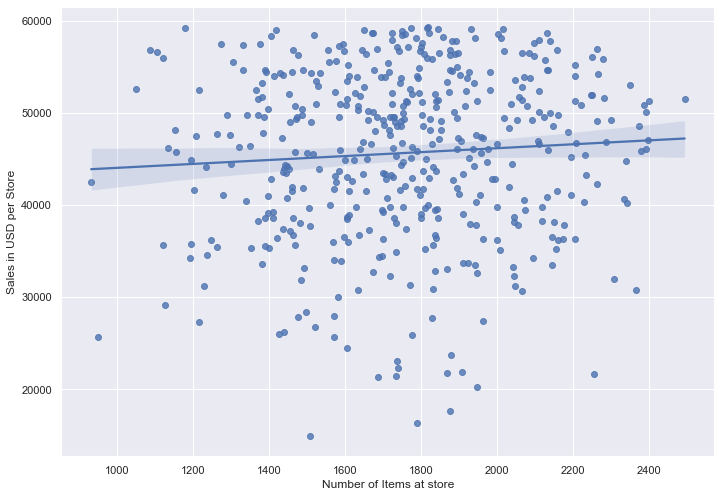

In [147]:
b2 = sns.regplot(x='Items_Available', y='Store_Sales', data =below_median_sales)
b2.set_xlabel('Number of Items at store')
b2.set_ylabel('Sales in USD per Store')

### visual of distribution of sales depending of the Size of store

Text(0, 0.5, 'Sales in USD per Store')

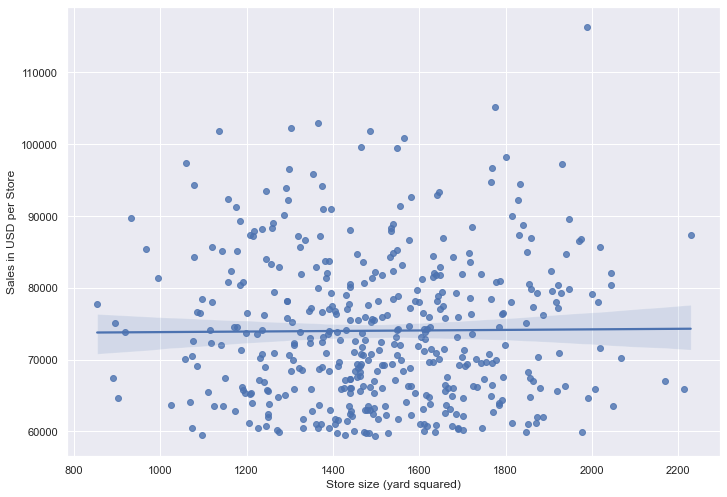

In [148]:
b3 = sns.regplot(x='Store_Area', y='Store_Sales', data =above_Median_Sales)
b3.set_xlabel('Store size (yard squared)')
b3.set_ylabel('Sales in USD per Store')

### visual of direct Correlation between size of store and number of items

Text(0, 0.5, 'Store size( yards squared)')

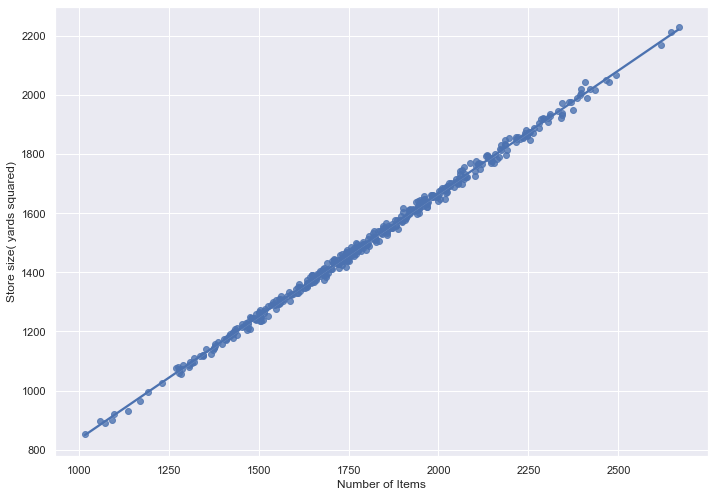

In [149]:
b4 = sns.regplot(x='Items_Available', y='Store_Area', data = above_Median_Sales)
b4.set_xlabel('Number of Items')
b4.set_ylabel('Store size( yards squared)')

In [ ]:
### The current data is lacking in other areas, such as type of items, demographic and customer service rating play a role in the sales reported by each store, which would be identifiers and may have direct correlation to sales.


## Trying to Identify which stores seem to required change in order to improve sales

In [152]:
clean_df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### stores with  moderate to high inventory and underperforming Sales numbers

In [160]:
stores_with_high_inven = clean_df[clean_df['Items_Available'] >= 1782]
help_needed = stores_with_high_inven[stores_with_high_inven['Store_Sales'] <= 59351]
help_needed.info()
help_needed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 4 to 889
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              214 non-null    int64
 1   Store_Area            214 non-null    int64
 2   Items_Available       214 non-null    int64
 3   Daily_Customer_Count  214 non-null    int64
 4   Store_Sales           214 non-null    int64
dtypes: int64(5)
memory usage: 10.0 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
4,5,1770,2111,450,46620
11,12,1751,2098,720,57620
13,14,1615,1931,1160,59130
17,18,1703,2045,670,38170
19,20,1940,2340,980,40190


In [161]:
#### there are a total of 214 stores that are under-performing while maintaining a high inventory amount. it can be infered that there are variables in play that could be adjusted to either increase Store Sales or mitigate overstocking of inventory.

In [162]:
clean_df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### Stores with moderate to high Customer Visits but low Sales Numbers

In [163]:
high_customer_visit = clean_df[clean_df['Daily_Customer_Count'] >= 786 ]
high_cus_low_sales = high_customer_visit[high_customer_visit['Store_Sales'] <= 59351]
high_cus_low_sales.info()
high_cus_low_sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 7 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              223 non-null    int64
 1   Store_Area            223 non-null    int64
 2   Items_Available       223 non-null    int64
 3   Daily_Customer_Count  223 non-null    int64
 4   Store_Sales           223 non-null    int64
dtypes: int64(5)
memory usage: 10.5 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
7,8,1261,1507,1020,37720
9,10,1030,1235,1130,44150
13,14,1615,1931,1160,59130
19,20,1940,2340,980,40190
22,23,1719,2065,950,52780


In [ ]:
#### there are a total of 223 stores which has moderate to high customer visits daily but under-performs in Sales, one can infer that this may be due to type/price of items at these stores as well as customer satisfaction, which it could correlate directly to purchase frequency of returning customer and total items sold per sale.

### Stores that has both high inventory and high customer visits but under-performs in Sales

In [164]:
Below_median = clean_df[clean_df['Store_Sales'] <= 59351]
high_inven = Below_median[Below_median['Items_Available'] >= 1782]
high_visits_and_inventory_low_sales = high_inven[high_inven['Daily_Customer_Count'] >= 786]
high_visits_and_inventory_low_sales.info()
high_visits_and_inventory_low_sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 13 to 877
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              96 non-null     int64
 1   Store_Area            96 non-null     int64
 2   Items_Available       96 non-null     int64
 3   Daily_Customer_Count  96 non-null     int64
 4   Store_Sales           96 non-null     int64
dtypes: int64(5)
memory usage: 4.5 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
13,14,1615,1931,1160,59130
19,20,1940,2340,980,40190
22,23,1719,2065,950,52780
38,39,1839,2204,1010,55170
51,52,1565,1880,1300,57830


In [165]:
### There are a total of 96 stores that should be the priority in terms of adjustments to account for higher Sales Numbers.